In [641]:
#Import necessary files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Analyse train and test dataset

In [642]:
data_train = pd.read_csv('/content/train_ctrUa4K.csv')
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [643]:
data_test = pd.read_csv('/content/test_lAUu6dG.csv')
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [644]:
train_original = data_train.copy()#Preserve a copy
test_original = data_test.copy()

In [645]:
data_train.info()#Check basic details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [646]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [647]:
data_train.shape

(614, 13)

In [648]:
data_test.shape

(367, 12)

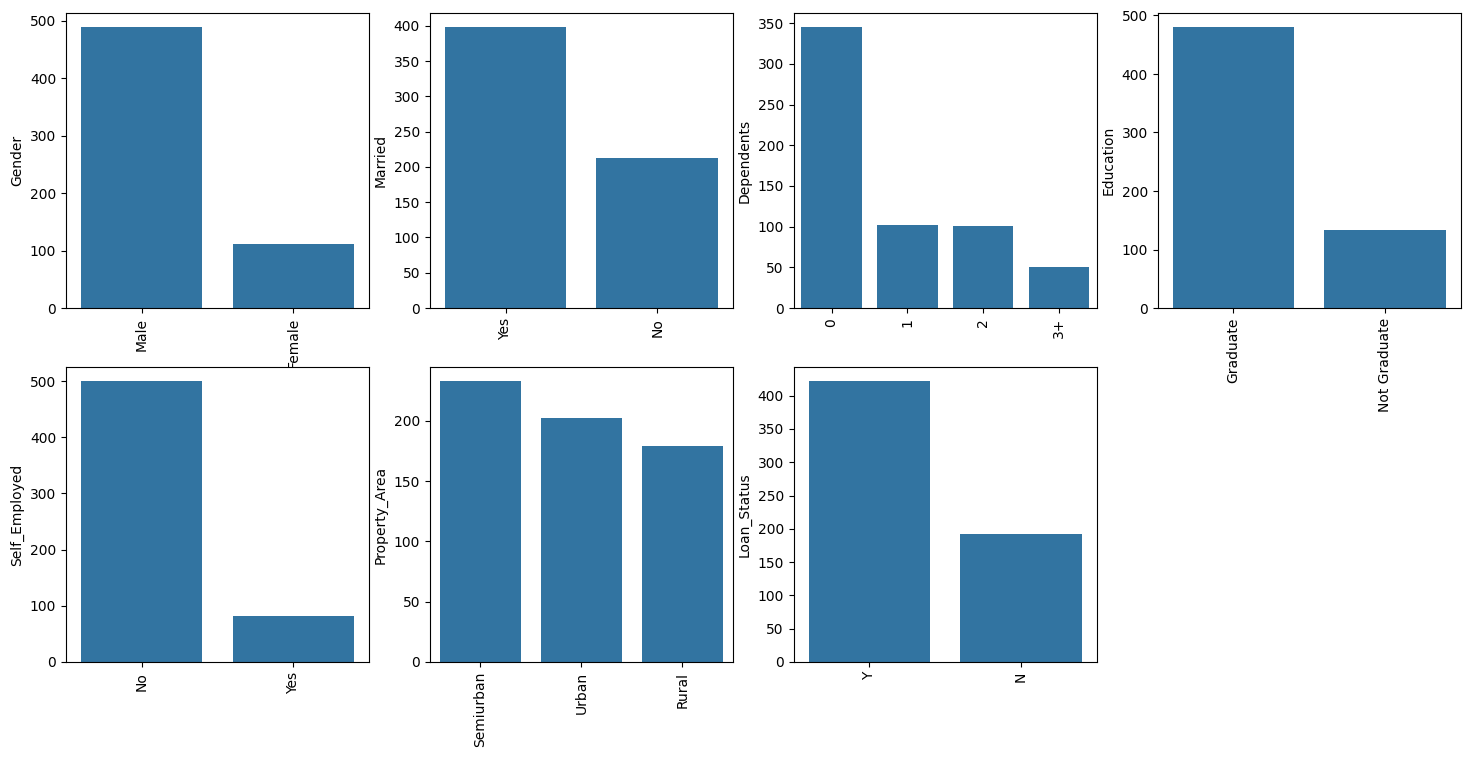

In [649]:
train_plot_cat = data_train.drop('Loan_ID',axis=1)
obj = (train_plot_cat.dtypes == 'object')

object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data_train[col].value_counts()
  plt.subplot(8,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1


80% of applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
About 15% of applicants in the dataset are self-employed.

Most of the applicants don’t have dependents.
Most of the applicants are graduates.
Most of the applicants are from semi-urban areas.


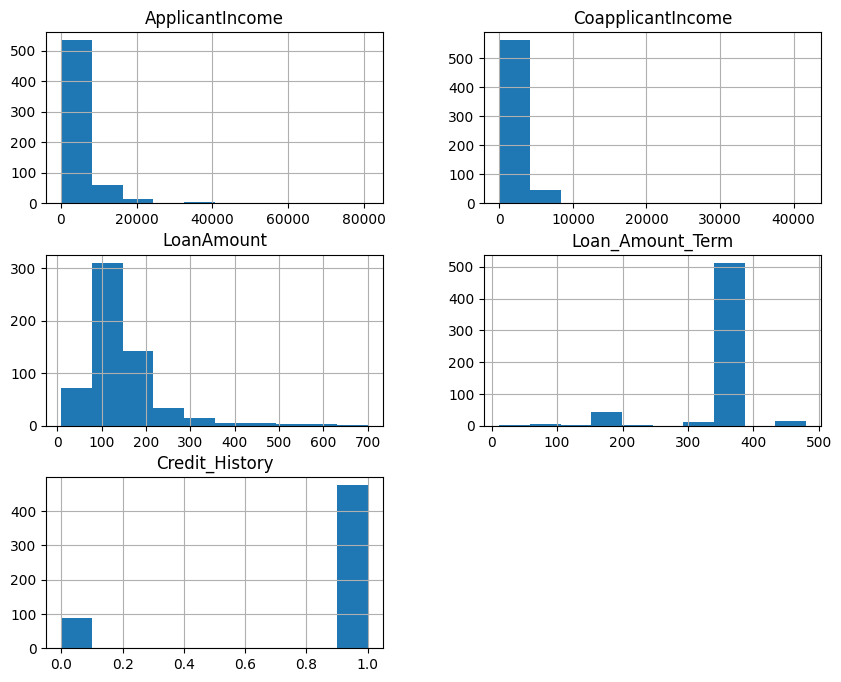

In [650]:
freqgraph = data_train.select_dtypes(include=['float64','int64'])
#freqgraph
freqgraph.hist(figsize=(10, 8))
plt.show()

<Axes: xlabel='Gender'>

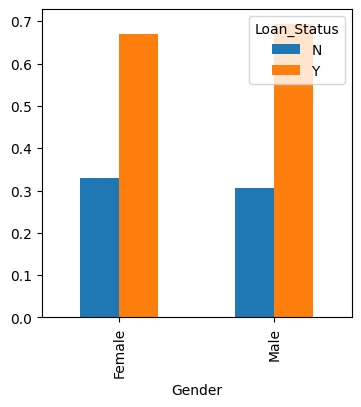

In [651]:
Gender=pd.crosstab(data_train['Gender'],data_train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))


It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.



<Axes: xlabel='Self_Employed'>

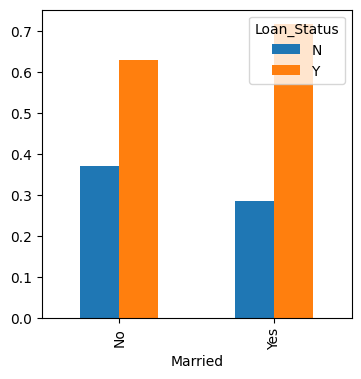

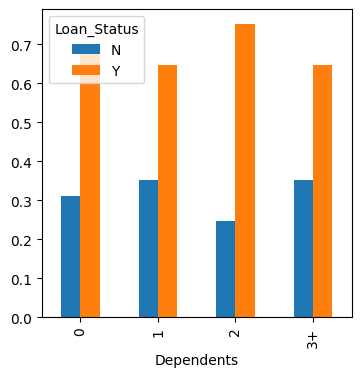

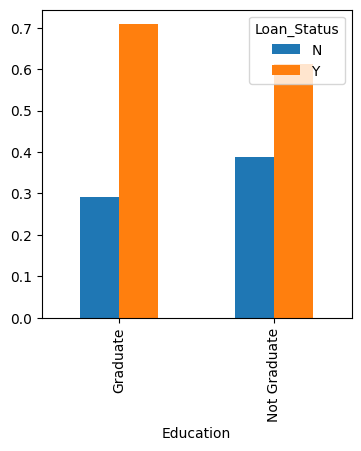

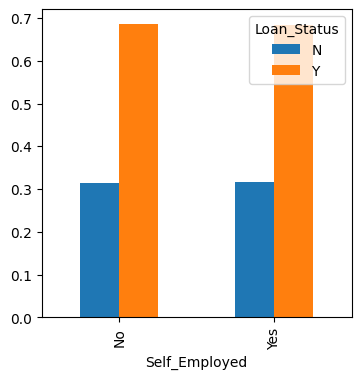

In [652]:
Married=pd.crosstab(data_train['Married'],data_train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
Dependents=pd.crosstab(data_train['Dependents'],data_train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
Education=pd.crosstab(data_train['Education'],data_train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
Self_Employed=pd.crosstab(data_train['Self_Employed'],data_train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))


The proportion of married applicants is higher for the approved loans.
The distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
There is nothing significant we can infer from Self_Employed vs Loan_Status plot.


<Axes: xlabel='Property_Area'>

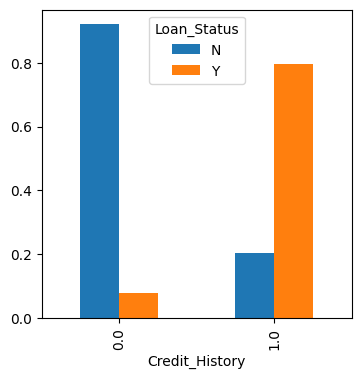

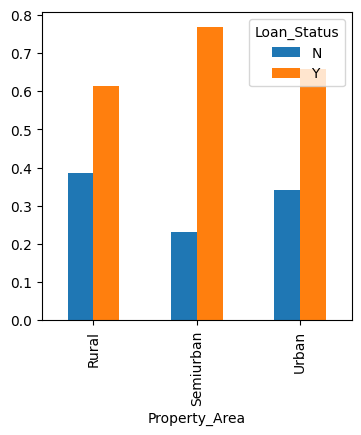

In [653]:
Credit_History=pd.crosstab(data_train['Credit_History'],data_train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
Property_Area=pd.crosstab(data_train['Property_Area'],data_train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))


It seems people with a credit history of 1 are more likely to get their loans approved.
The proportion of loans getting approved in semi-urban areas is higher as compared to that in rural or urban areas.


<Axes: xlabel='Loan_Status'>

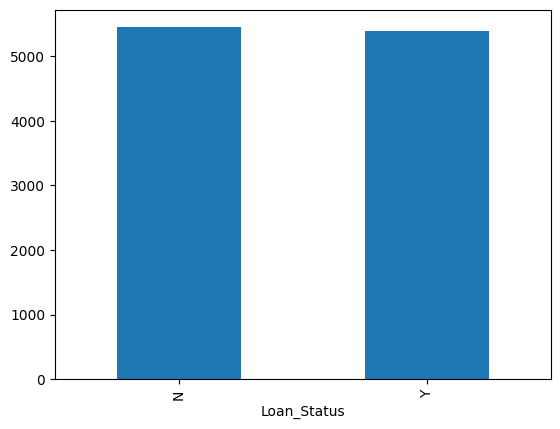

In [654]:
data_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


It can be inferred that Applicant’s income does not affect the chances of loan approval .


In [655]:
data_train['Loan_Status'].value_counts(normalize=True)


Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Y    422
N    192
Name: Loan_Status, dtype: int64


<Axes: >

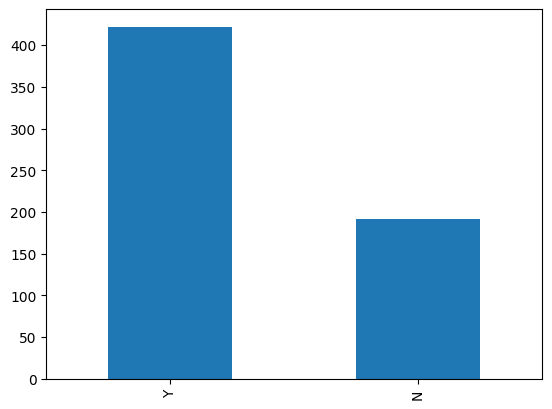

In [656]:
print(data_train['Loan_Status'].value_counts())

data_train['Loan_Status'].value_counts().plot.bar()


422(around 69%) people out of 614 got the approval.



<ipython-input-657-11bc37b16559>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix= data_train.corr()


<Axes: >

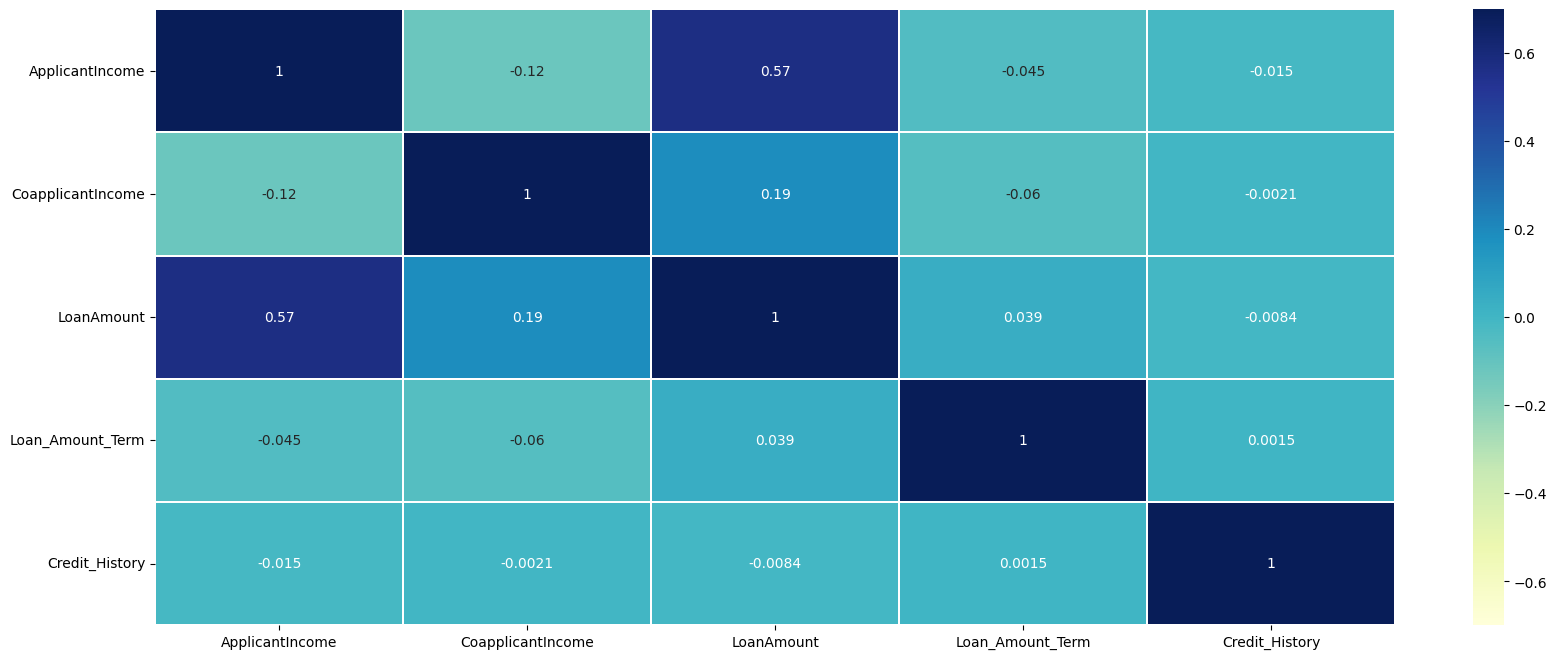

In [657]:
#Plot correlation map
corrmatrix= data_train.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')

We see that the most correlated variables are ApplicantIncome and LoanAmount

#Missing Value and Outlier Handling


In [658]:
data_train.isna().sum() #Find missing values in training data

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.



In [659]:
data_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [660]:
data_train['Gender'] = data_train['Gender'].fillna(data_train['Gender'].mode()[0])
data_train['Married'] = data_train['Married'].fillna(data_train['Married'].mode()[0])
data_train['Dependents'] = data_train['Dependents'].fillna(data_train['Dependents'].mode()[0])
data_train['Self_Employed'] = data_train['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0])


In [661]:
data_train['Loan_Amount_Term'].value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [662]:
data_train['Loan_Amount_Term'].mean()


342.0

In the case of Loan_Amount_Term variable Value 360 occures 512 times .So we go with mode

---



In [663]:
#print(data_train['LoanAmount'].std())
print(data_train['LoanAmount'].mean())
print(data_train['LoanAmount'].median())


146.41216216216216
128.0


Variation is high so go with median

In [664]:
data_train['Credit_History'].value_counts()


1.0    475
0.0     89
Name: Credit_History, dtype: int64

In the case of Credit_History variable Value 1 occures 475 times .So we go with mode


In [665]:

data_train['LoanAmount'] = data_train['LoanAmount'].fillna(data_train['LoanAmount'].median())#Not eaqualy distributed
data_train['Loan_Amount_Term'] = data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mode()[0])
data_train['Credit_History'] = data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0])


In [666]:
data_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Check missing values in test dataset

In [667]:
data_test.isna().sum()#Check missing values in test dataset

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

There are missing values in Gender, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.


In [668]:
data_test['Gender'] = data_test['Gender'].fillna(data_train['Gender'].mode()[0])
data_test['Dependents'] =data_test['Dependents'].fillna(data_train['Dependents'].mode()[0])
data_test['Self_Employed'] =data_test['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0])
data_test['Credit_History'] =data_test['Credit_History'].fillna(data_train['Credit_History'].mode()[0])
data_test['Loan_Amount_Term'] =data_test['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mode()[0])
data_test['LoanAmount'] =data_test['LoanAmount'].fillna(data_train['LoanAmount'].median())


In [669]:
data_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Outlier detection and handling in train dataset

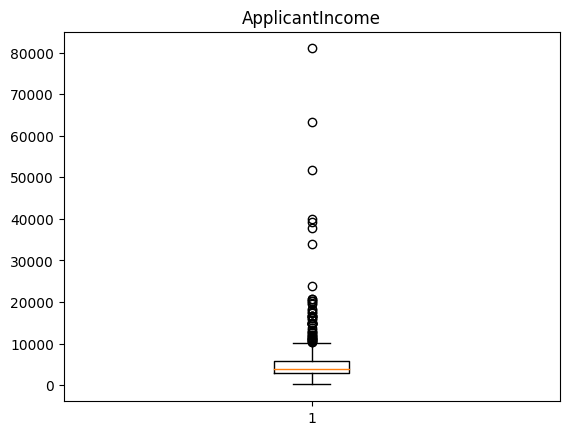

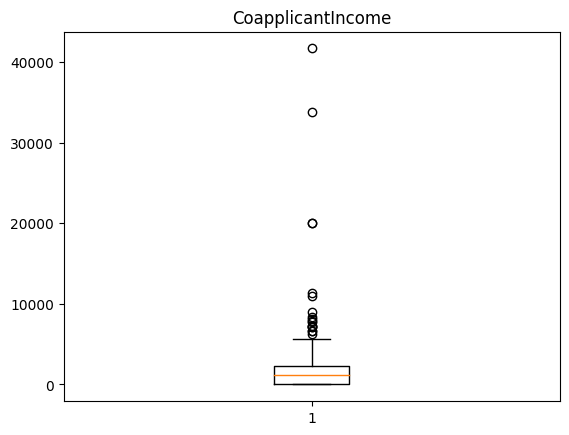

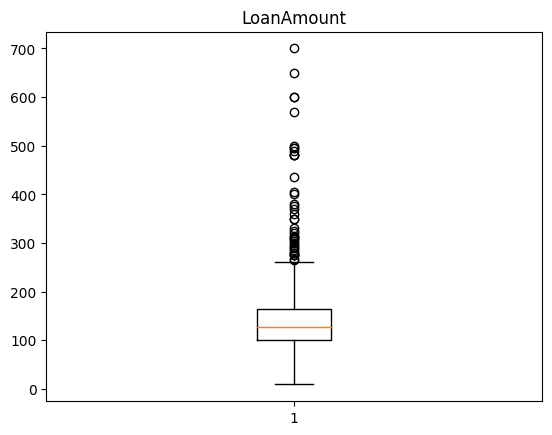

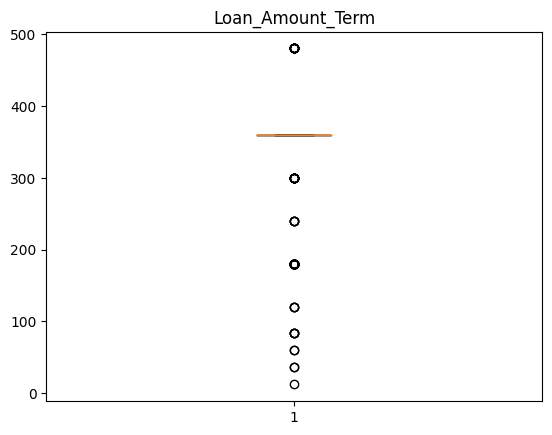

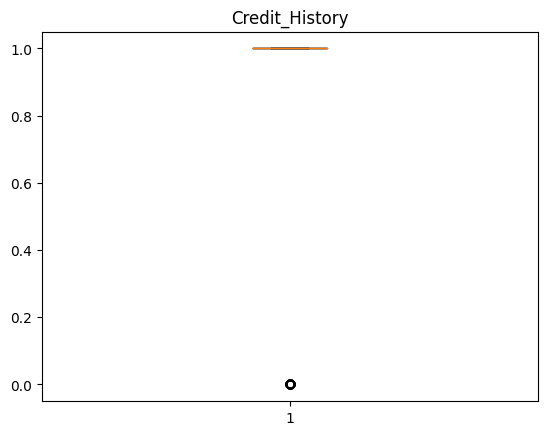

In [670]:
num_columns=data_train.select_dtypes(include=['float64','int64'])
for i in num_columns:
  plt.figure()
  plt.boxplot(data_train[i])
  plt.title(i)


All columns contains outliers

In [671]:
for i in num_columns:#IQR method for handling outliers
  Q1=np.percentile(data_train[i],25,method='midpoint')
  Q2=np.percentile(data_train[i],50,method='midpoint')
  Q3=np.percentile(data_train[i],75,method='midpoint')
  IQR=Q3-Q1
  low_lim = Q1-1.5*IQR
  up_lim = Q3+1.5*IQR
  print("lower limit:",low_lim)
  print("upper limit:",up_lim)
  outlier=[]
  for x in data_train[i]:
    if(x<low_lim) or (x>up_lim):
      outlier.append(x)
  print(outlier)
  #clip method to handle
  data_train[i] = data_train[i].clip(lower=low_lim,upper=up_lim)


lower limit: -1487.5
upper limit: 10156.5
[12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803, 10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147, 12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000, 63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692, 16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250, 18165, 19484, 16666, 16120, 12000]
lower limit: -3438.75
upper limit: 5731.25
[10968.0, 8106.0, 7210.0, 8980.0, 7750.0, 11300.0, 7250.0, 7101.0, 6250.0, 7873.0, 20000.0, 20000.0, 8333.0, 6667.0, 6666.0, 7166.0, 33837.0, 41667.0]
lower limit: 4.5
upper limit: 260.5
[267.0, 349.0, 315.0, 320.0, 286.0, 312.0, 265.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 330.0, 436.0, 480.0, 300.0, 376.0, 490.0, 308.0, 570.0, 380.0, 296.0, 275.0, 360.0, 405.0, 500.0, 480.0, 311.0, 480.0, 400.0, 324.0, 600.0, 275.0, 292.0, 350.0, 496.0]
lower limit: 360.0
upper limit: 360.0
[120.0, 240.0, 180.0, 180.0, 60.0, 300.0, 480.0, 30

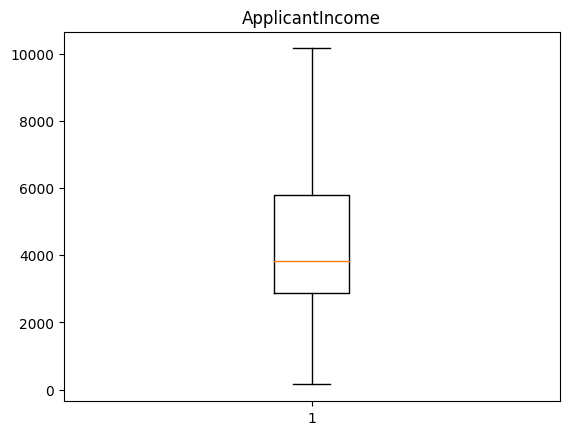

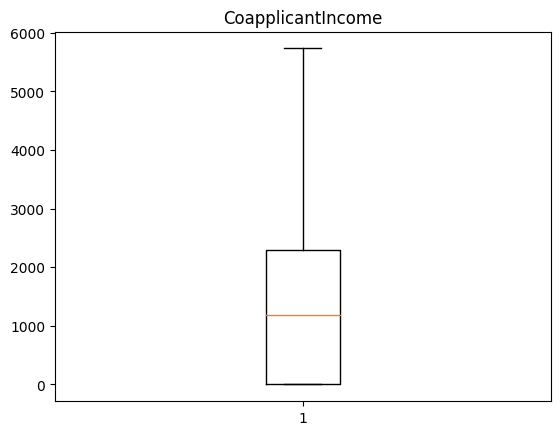

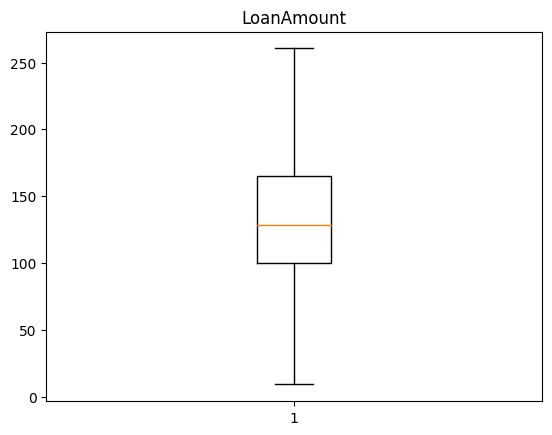

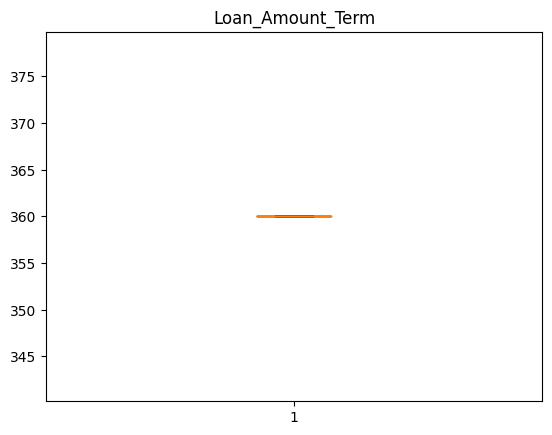

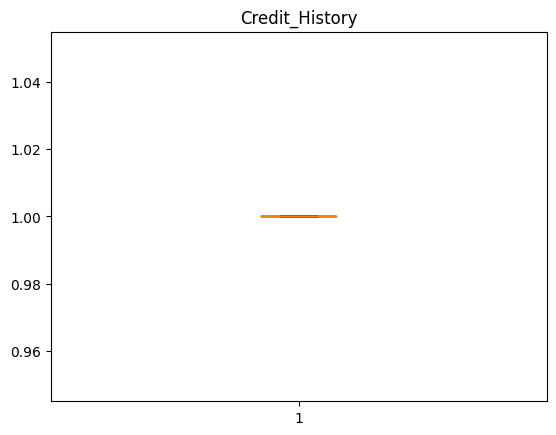

In [672]:
for i in num_columns:
  plt.figure()
  plt.boxplot(data_train[i])
  plt.title(i)


Checking and handling of outliers in test dataset

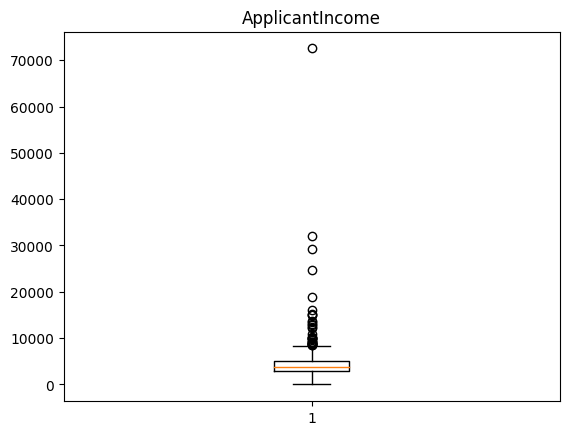

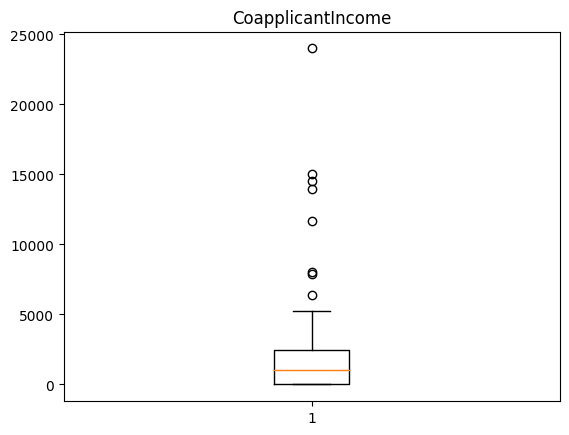

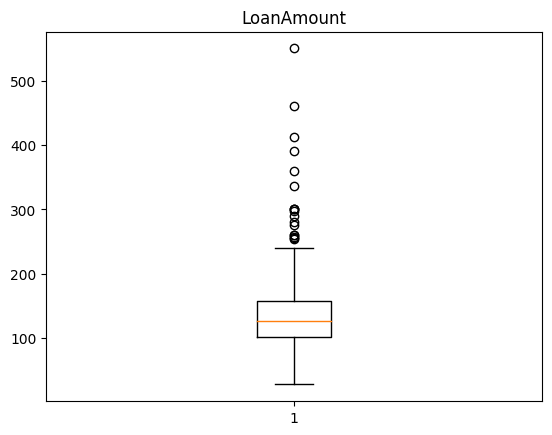

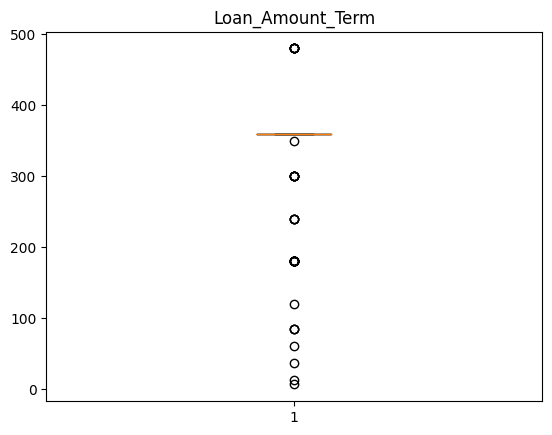

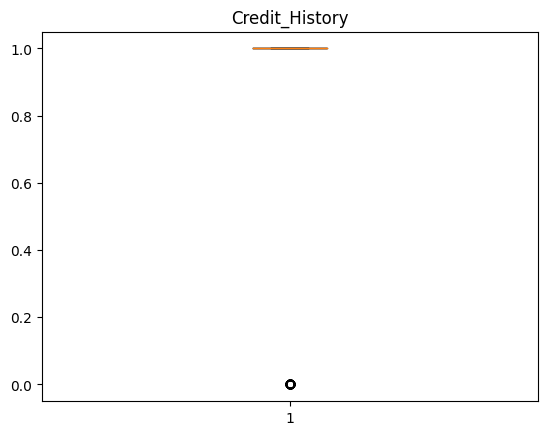

In [673]:
num_columns_test=data_test.select_dtypes(include=['float64','int64'])
for i in num_columns_test:
  plt.figure()
  plt.boxplot(data_test[i])
  plt.title(i)


In [674]:
for i in num_columns_test:
  Q1=np.percentile(data_test[i],25,method='midpoint')
  Q2=np.percentile(data_test[i],50,method='midpoint')
  Q3=np.percentile(data_test[i],75,method='midpoint')
  IQR=Q3-Q1
  low_lim = Q1-1.5*IQR
  up_lim = Q3+1.5*IQR
  print("lower limit:",low_lim)
  print("upper limit:",up_lim)
  outlier=[]
  for x in data_test[i]:
    if(x<low_lim) or (x>up_lim):
      outlier.append(x)
  print(outlier)
  #clip method to handle
  data_test[i] = data_test[i].clip(lower=low_lim,upper=up_lim)


lower limit: -430.0
upper limit: 8354.0
[13633, 12173, 9226, 72529, 8449, 13518, 9719, 12500, 32000, 10890, 12941, 8703, 15312, 10166, 9167, 13083, 10000, 8706, 14911, 10000, 18840, 24797, 29167, 9000, 10000, 8750, 14987, 16000, 9699, 8667, 8550, 9200]
lower limit: -3645.75
upper limit: 6076.25
[7916, 24000, 8000, 6414, 14507, 13983, 11666, 15000]
lower limit: 16.25
upper limit: 242.25
[280.0, 300.0, 290.0, 275.0, 360.0, 257.0, 390.0, 256.0, 300.0, 550.0, 260.0, 336.0, 412.0, 460.0, 297.0, 300.0, 260.0, 254.0]
lower limit: 360.0
upper limit: 360.0
[240.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 60.0, 480.0, 180.0, 180.0, 480.0, 180.0, 180.0, 84.0, 240.0, 12.0, 300.0, 300.0, 350.0, 240.0, 180.0, 84.0, 480.0, 300.0, 36.0, 480.0, 300.0, 180.0, 480.0, 180.0, 180.0, 480.0, 300.0, 480.0, 180.0, 480.0, 84.0, 300.0, 180.0, 120.0, 6.0, 240.0, 180.0, 180.0, 300.0, 180.0, 180.0]
lower limit: 1.0
upper limit: 1.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

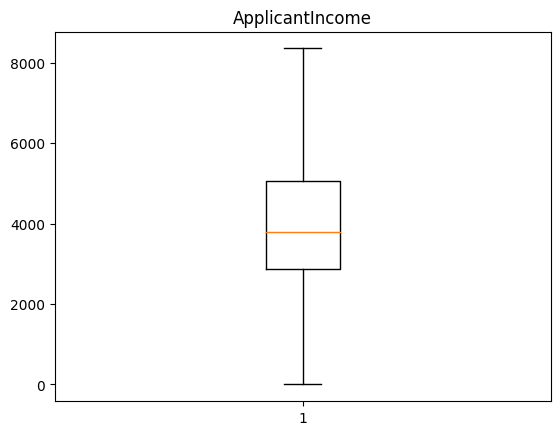

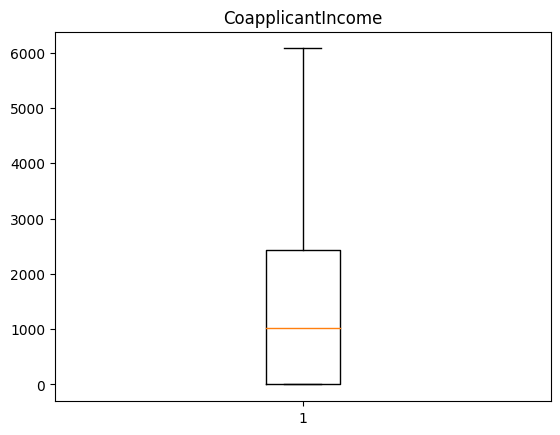

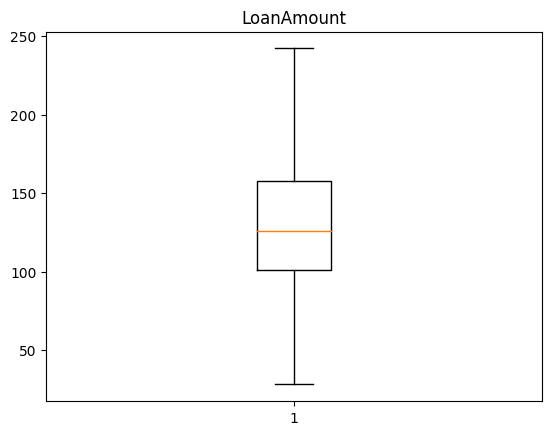

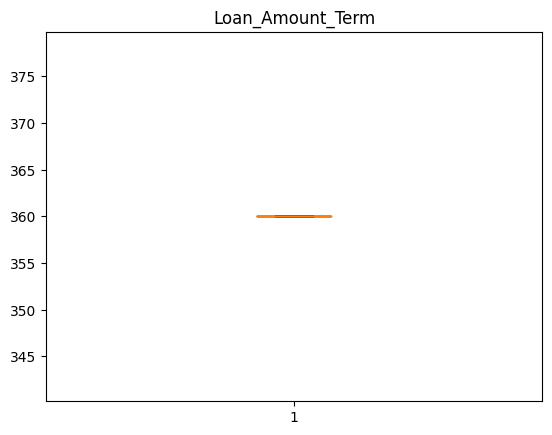

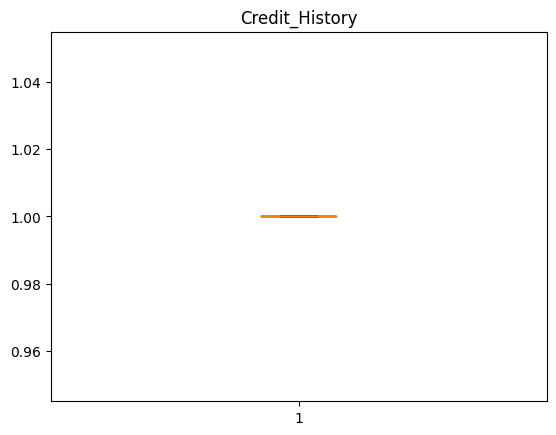

In [675]:
for i in num_columns_test:
  plt.figure()
  plt.boxplot(data_test[i])
  plt.title(i)


In [676]:
data_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [677]:
data_train=data_train.drop('Loan_ID',axis=1)
data_test=data_test.drop('Loan_ID',axis=1)


In [678]:
y = data_train['Loan_Status']  #Target variable
x= data_train.drop(['Loan_Status'],axis=1)#Independent variables

In [679]:
x=pd.get_dummies(x)  #One hot encoding
data_train=pd.get_dummies(data_train)
data_test=pd.get_dummies(data_test)


In [680]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=.25)

In [681]:
#Do scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [682]:
x_train_sc = scaler.fit_transform(x_train)
x_test_sc =  scaler.fit_transform(x_test)

1.Logistic Regression model

In [683]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)


In [684]:
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [685]:
y_log_pred = log_reg.predict(x_test)
y_log_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y'],
      dtype=object)

In [686]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [687]:
confusion_matrix(y_test,y_log_pred)

array([[ 2, 52],
       [ 2, 98]])

In [688]:
print("Accuracy: ",accuracy_score(y_test,y_log_pred))
print("Precision: ",precision_score(y_test,y_log_pred,average='micro'))
print("Recall: ",recall_score(y_test,y_log_pred,average='micro'))
print("f1 score: ",f1_score(y_test,y_log_pred,average='micro'))

Accuracy:  0.6493506493506493
Precision:  0.6493506493506493
Recall:  0.6493506493506493
f1 score:  0.6493506493506493


In [689]:
#Predict using test dataset
pred_test = log_reg.predict(data_test)


In [690]:
#Read sample submission file
submission=pd.read_csv("/content/sample_submission_49d68Cx.csv")
submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [691]:
#Assign values
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']


In [692]:
#Replace 0 with N and 1 with Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)


In [693]:
#Convert submission to csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('log_regression.csv',index=False)


In [694]:
final_data=pd.read_csv("/content/log_regression.csv") #Read predicted file
final_data

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


2.Decision tree

In [695]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)


In [696]:
print("Accuracy: ",accuracy_score(y_test,y_pred))


Accuracy:  0.5194805194805194


Accuracy less than Logistic regression

In [697]:
train_original['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

3.SVM model

In [698]:
from sklearn.svm import SVC
sv_cl = SVC(kernel='poly')#kernel can be polinomeal,rbf#hypermarameter turning
sv_cl.fit(x_train,y_train)

SVC(kernel='poly')

In [699]:
y_pred_svm = sv_cl.predict(x_test)

In [700]:
print("Accuracy: ",accuracy_score(y_test,y_pred_svm))


Accuracy:  0.6493506493506493


Accuracy same to logistic regression model

4.Random Forest

In [701]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1 =RandomForestClassifier(n_estimators=25,max_depth=25,criterion='gini')
rf_clf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=25)

In [702]:
y_pred_random = rf_clf1.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred_random))

Accuracy is 0.5909090909090909


Accuracy less than logistic model

5.KNN model

In [703]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

In [704]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn = classifier.predict(x_test)
  accuracy= accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

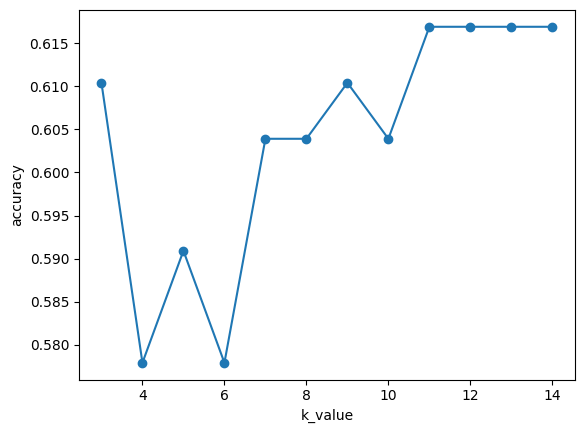

In [705]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [706]:
classifier = KNeighborsClassifier(n_neighbors=12,metric='minkowski',p=2) #12 is the highest data point
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)


In [707]:
print("Accuracy: ",accuracy_score(y_test,y_pred_knn))
print("Precision: ",precision_score(y_test,y_pred_knn,average='micro'))
print("Recall: ",recall_score(y_test,y_pred_knn,average='micro'))
print("f1 score: ",f1_score(y_test,y_pred_knn,average='micro'))

Accuracy:  0.6168831168831169
Precision:  0.6168831168831169
Recall:  0.6168831168831169
f1 score:  0.6168831168831169


Accuracy less than logistic model

#Cross validation

In [708]:
from sklearn.model_selection import KFold

In [709]:
from sklearn.model_selection import cross_val_score


In [710]:
kfold_validator=KFold(10) #no of folds
cv_score=cross_val_score(log_reg,x,y,cv=kfold_validator)
print(cv_score)
cv_score.mean()


[0.64516129 0.70967742 0.64516129 0.67741935 0.67213115 0.75409836
 0.68852459 0.70491803 0.70491803 0.6557377 ]


0.685774722369117

In [711]:
#stratified cv
from sklearn.model_selection import StratifiedKFold
stratified_cv =StratifiedKFold(n_splits=10)
cv_score_sr=cross_val_score(log_reg,x,y,cv=stratified_cv)
cv_score


array([0.64516129, 0.70967742, 0.64516129, 0.67741935, 0.67213115,
       0.75409836, 0.68852459, 0.70491803, 0.70491803, 0.6557377 ])

In [712]:
cv_score.mean()

0.685774722369117

The mean validation accuracy for Logistic model model is 0.685774722369117

#Checking various models we got Logistic regression model is performing good